In [11]:
# MONTH 2
from sklearn import datasets
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import argparse
import uuid
import cv2
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import argparse
import glob
import mahotas
from scipy.spatial import distance as dist
import numpy as np
import mahotas
import cv2
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import argparse
import imutils
import cv2
 

In [4]:
digits = datasets.load_digits()
digits

In [3]:
# plt.imshow(digits['images'][100],cmap='gray')

# cv2.imshow('jkljk',digits['images'][1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

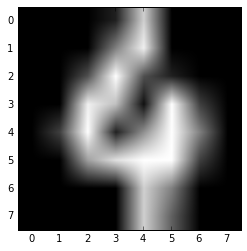

In [15]:
plt.imshow(digits['images'][100], cmap='gray')

In [17]:
T, thresh = cv2.threshold(digits['images'][100], 0, 254, cv2.THRESH_OTSU)

error: /home/i008/opencv/opencv-2.4.10/modules/imgproc/src/thresh.cpp:719: error: (-215) src.type() == CV_8UC1 in function threshold


In [28]:
import numpy as np

ot = cv2.threshold(digits['images'][666].astype("uint8"), 0, 255, cv2.THRESH_OTSU)

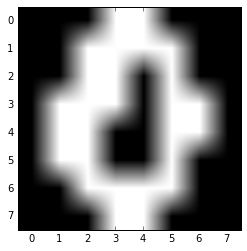

In [29]:
plt.imshow(ot[1],cmap='gray')

# 4.3: k-Nearest Neighbor classification


In [3]:
# import the necessary packages
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
 
# load the MNIST digits dataset
mnist = datasets.load_digits()
 
# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
    mnist.target, test_size=0.5, random_state=42)
 
# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
    test_size=0.1, random_state=84)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 808
validation data points: 90
testing data points: 899


In [4]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in xrange(1, 30, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# find the value of k that has the largest accuracy
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))

k=1, accuracy=97.78%
k=3, accuracy=98.89%
k=5, accuracy=97.78%
k=7, accuracy=97.78%
k=9, accuracy=97.78%
k=11, accuracy=98.89%
k=13, accuracy=97.78%
k=15, accuracy=96.67%
k=17, accuracy=95.56%
k=19, accuracy=96.67%
k=21, accuracy=96.67%
k=23, accuracy=95.56%
k=25, accuracy=95.56%
k=27, accuracy=95.56%
k=29, accuracy=95.56%
k=3 achieved highest accuracy of 98.89% on validation data


In [5]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        82
          1       0.97      1.00      0.98        89
          2       0.99      1.00      0.99        83
          3       0.99      0.96      0.97        93
          4       0.99      0.99      0.99        93
          5       0.99      0.98      0.98        99
          6       1.00      1.00      1.00        98
          7       0.96      0.99      0.97        87
          8       0.99      0.98      0.98        83
          9       0.98      0.96      0.97        92

avg / total       0.98      0.98      0.98       899



/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


I think that digit is: 7
I think that digit is: 9
I think that digit is: 5

/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



I think that digit is: 4
I think that digit is: 3


/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


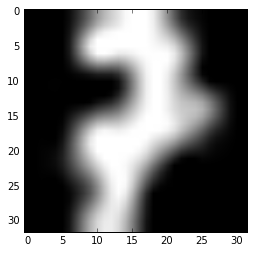

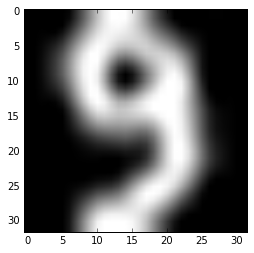

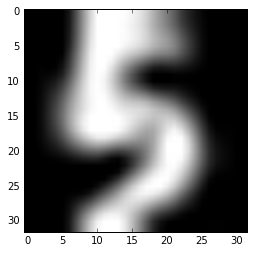

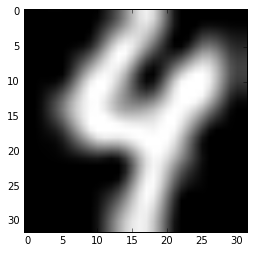

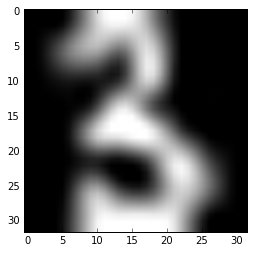

In [8]:
# loop over a few random digits
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    # grab the image and classify it
    image = testData[i]
    prediction = model.predict(image)[0]

    # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((8, 8)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

    # show the prediction
    plt.figure()
    print("I think that digit is: {}".format(prediction))
    plt.imshow(image,cmap='gray')

# 10.4: Hu Moments


In [6]:
image = cv2.imread('data/humoments_planes.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
moments = cv2.HuMoments(cv2.moments(image)).flatten()
moments

array([  8.89880773e-03,   7.57204412e-05,   2.38651674e-08,
         1.85900330e-08,   3.91558010e-16,   1.61708196e-10,
        -2.12085766e-18])

[  2.00162991e-03   3.01754249e-06   3.08984971e-11   4.14364409e-11
   4.97600769e-22   5.93897843e-14   1.39666817e-21]
[  1.80851599e-03   1.92184829e-06   5.41577862e-10   4.41334901e-11
   5.46923123e-21  -2.19817014e-14  -4.07951523e-21]
[  1.18498670e-03   1.91160278e-07   5.89818694e-10   2.59586273e-14
   8.63387433e-26   2.03739557e-18   5.35057510e-26]


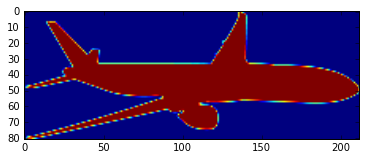

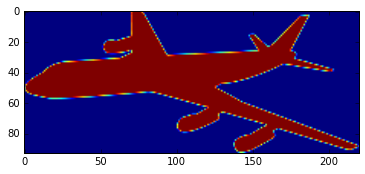

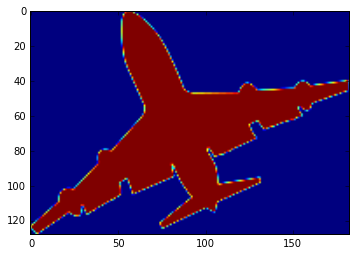

In [10]:
(cnts, _) = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, c in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    roi = image[y:y+h, x:x+w]
    moments  = cv2.HuMoments(cv2.moments(roi)).flatten()
    plt.figure()
    plt.imshow(roi)
    print moments

In [11]:
!mkdir testingimages

In [21]:
for i in xrange(0, 333):
    # allocate memory for the image, then generate the (x, y)
    # center of the circle, then generate the radius of the
    # circle, ensuring that the circle is fully contained in
    # the image
    image = np.zeros((500, 500, 3), dtype="uint8")
    (x, y) = np.random.uniform(low=105, high=405, size=(2,)).astype("int0")
    r = np.random.uniform(low=25, high=100, size=(1,)).astype("int0")[0]

    # randomly generate a color for the circle, draw it, and
    # write the image to file using a random filename
    color = np.random.uniform(low=0, high=255, size=(3,)).astype("int0")
    cv2.circle(image, (x, y), r, color, -1)
    cv2.imwrite("testingimages/{}.jpg".format(uuid.uuid4()), image)
    # allocate memory for the rectangle image, then generate the starting
    # and ending (x, y) coordinates of the square
    
image = np.zeros((500, 500, 3), dtype="uint8")
topLeft = np.random.uniform(low=25, high=225, size=(2,)).astype("int0")
botRight = np.random.uniform(low=250, high=400, size=(2,)).astype("int0")

# draw the rectangle on the image and write it to file, again,
# using a random filename
color = np.random.uniform(low=0, high=255, size=(3,)).astype("int0")
cv2.rectangle(image, tuple(topLeft), tuple(botRight), color, -1)
cv2.imwrite("testingimages/{}.jpg".format(uuid.uuid4()), image)

True

In [5]:
from concurrent.futures import ProcessPoolExecutor
from concurrent import futures


list_of_images = sorted(glob.glob('testingimages/*.jpg'))


def load_and_process(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY)[1]
    (cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(cnts, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
#     roi = cv2.resize(thresh[y:y+h, x:x+w], (50, 50))
    roi = thresh[y:y+h, x:x+w]
    moments = cv2.HuMoments(cv2.moments(roi)).flatten()
    return moments


with ProcessPoolExecutor(6) as executor:
    data = executor.map(load_and_process, list_of_images)

    
# with ProcessPoolExecutor(13) as executor:
#     futures = [
#         executor.submit(load_and_process, p) 
#         for p in glob.glob('testingimages/*.jpg')
#     ]

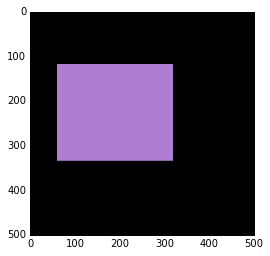

In [90]:
data = list(data)
D = pairwise_distances(data).sum(axis=1)
i = np.argmax(D)
image = cv2.imread(list_of_images[i])
plt.imshow(image)

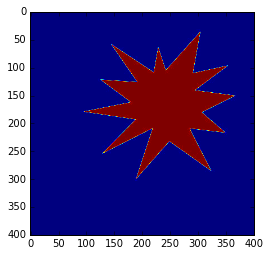

In [106]:
image = cv2.imread('data/shape_explosion.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(cnts, _) = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = max(cnts, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(c)
roi = image[y:y+h,x:x+w]
cv2.HuMoments(cv2.moments(roi))

plt.imshow(image)

In [109]:
image = cv2.imread('data/more_shapes_example.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(cnts, _) = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)
    if len(approx) < 10:
        continue
        
    (x, y, w, h) = cv2.boundingRect(c)
    crop = image[y:y+h, x:x+w]
    hu = cv2.HuMoments(cv2.moments(crop))
    print hu

[[  9.88622713e-04]
 [  7.90187765e-17]
 [  1.08888251e-18]
 [  1.01428232e-23]
 [ -2.96884573e-44]
 [  7.27516421e-32]
 [  1.59625448e-44]]


In [17]:
ppe = ProcessPoolExecutor(4)

In [18]:
fut = ppe.submit(lambda x: x**7, 1890)

Traceback (most recent call last):
  File "/home/i008/anaconda2/lib/python2.7/multiprocessing/queues.py", line 268, in _feed
    send(obj)
PicklingError: Can't pickle <type 'function'>: attribute lookup __builtin__.function failed


In [19]:
g = futures.as_completed(fut)

In [20]:
g.next()

TypeError: 'Future' object is not iterable

In [40]:
glob.glob('data/g*.*')

['data/grand_canyon.png', 'data/giraffe.png']

In [25]:
('dir/*[0-9].*'

['data/RealPythonPart3-TOC.pdf',
 'data/morph_pyimagesearch_logo.png',
 'data/raptors_02.png',
 'data/circle.png',
 'data/circle.gif',
 'data/basic_shapes.png',
 'data/grand_canyon.png',
 'data/cl.png',
 'data/coins02.png',
 'data/coins01.png',
 'data/giraffe.png',
 'data/contours_receipt_original.jpg',
 'data/contours_tictactoe.png',
 'data/raptors_01.png',
 'data/beach.png',
 'data/license_plate.png',
 'data/florida_trip_small.png',
 'data/zua9t.1',
 'data/trex_01.png',
 'data/contours_tetris_blocks.png',
 'data/morph_car.png',
 'data/wynn.png',
 'data/lego_blocks_1.png',
 'data/lplinux.tar.bz2',
 'data/adaptive_threhsold_license_plate.png',
 'data/triangle2.png',
 'data/triangle.png',
 'data/zua9t',
 'data/screencloud_1.2.0-1_amd64.deb',
 'data/more_shapes.png',
 'data/trex_04.png',
 'data/trex_02.png',
 'data/clonazepam_1mg.png',
 'data/dog_contour.png',
 'data/shape_explosion.jpg',
 'data/contours_circles_and_squares.png',
 'data/trex_03.png',
 'data/new.jpg',
 'data/haarcascade_f

# 10.5: Zernike Moments


In [26]:
def describe_shapes(image):
    
    shape_features = []
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (13, 13), 0)
    thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)[-1]

    thresh = cv2.dilate(thresh, None, iterations=4)
    thresh = cv2.erode(thresh, None, iterations=2)
    (cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for c in cnts:
        mask = np.zeros(image.shape[:2], dtype = 'uint8')
        cv2.drawContours(mask, [c], -1, 255, -1)
        (x, y, w, h) = cv2.boundingRect(c)
        roi = mask[y:y+h, x:x+w]
        features = mahotas.features.zernike_moments(roi, max(w / 2, h / 2), degree=8)
        shape_features.append(features)
    
    
    return (cnts, shape_features)

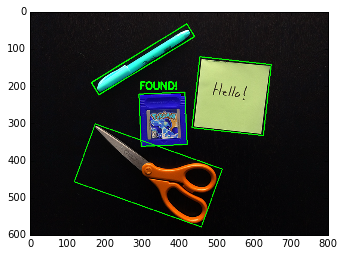

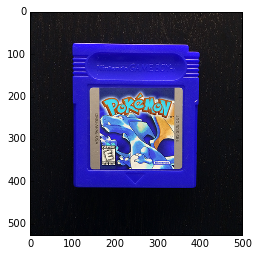

In [33]:
ref_shapes = cv2.imread('data/shapes.png')
(cnts, shape_features) = describe_shapes(ref_shapes)

pokemon = cv2.imread('data/pokemon_red.png')
(_, game_features) = describe_shapes(pokemon)

D = dist.cdist(game_features, shape_features)
i = np.argmin(D)

for (j, c) in enumerate(cnts):
    if i != j:
        box = cv2.minAreaRect(c)
        box = np.int0(cv2.cv.BoxPoints(box))
        cv2.drawContours(ref_shapes, [box], -1, (0, 255, 0), 2)

box = cv2.minAreaRect(cnts[i])
box = np.int0(cv2.cv.BoxPoints(box))
cv2.drawContours(ref_shapes, [box], -1, (0, 255, 0), 2)
(x, y, w, h) = cv2.boundingRect(cnts[i])
cv2.putText(ref_shapes, "FOUND!", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3)

plt.figure()
plt.imshow(ref_shapes)
plt.figure()
plt.imshow(pokemon)

In [37]:
check = cv2.imread('data/checkmark.jpg')
gray = cv2.cvtColor(check, cv2.COLOR_BGR2GRAY)
features = mahotas.features.zernike_moments(gray, 200, degree=3)
features

array([  3.18309886e-01,   3.90378614e-15,   7.69668608e-01,
         7.28434313e-02,   1.40280019e-02,   1.53891926e-02])

# HARLICK TEXTURES 10.6

In [22]:
from sklearn.svm import LinearSVC
import mahotas
import glob
import cv2
import os
import numpy as np
import pandas as pd

In [27]:
# data , labels = [], []
# for image_path in glob.glob('data/harlick_lesson10_6/training/*.png'):
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     texture = os.path.split(image_path)[-1].split('_')[0]
#     features = mahotas.features.haralick(image).mean(axis=0)
#     data.append(features)
#     labels.append(texture)
    
# model = LinearSVC(C=10.0, random_state=42)
# model.fit(data, labels)

# for image_path in glob.glob('data/harlick_lesson10_6/testing/*.png'):
#     image = cv2.imread(image_path)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     features = mahotas.features.haralick(gray).mean(axis=0)
#     print features
#     pred = model.predict(features)[0]
#     cv2.putText(image, pred, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
#     plt.figure()
#     plt.imshow(image)
    
    
    
#quiz
image = cv2.imread('data/harlick_lesson10_6/sand.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
features = mahotas.features.haralick(gray).mean(axis=0)
print features

[  9.34357954e-05   8.62738922e+02   7.09393399e-01   1.48433961e+03
   5.59585674e-02   2.41888651e+02   5.07461953e+03   8.17063613e+00
   1.37978253e+01   7.73429179e-05   5.86469589e+00  -1.04990606e-01
   8.80765837e-01]


# 10.7: Local Binary Patterns


In [9]:

# IN PROJECTS
L = [0,1,0,1,1,1,0,1]
sum([2**n for x, n in  zip(L, range(0, len(L))) if x != 0])

186

In [7]:
for a, b in zip(L, range(0, len(L))):
    print a, b

0 0
1 1
0 2
1 3
1 4
1 5
0 6
1 7


# 10.8: Histogram of Oriented Gradients

The 5 stages include:  

-Normalizing the image prior to description.  
-Computing gradients in both the x and y directions.  
-Obtaining weighted votes in spatial and orientation cells.  
-Contrast normalizing overlapping spatial cells.  
-Collecting all Histograms of Oriented gradients to form the final feature vector.  


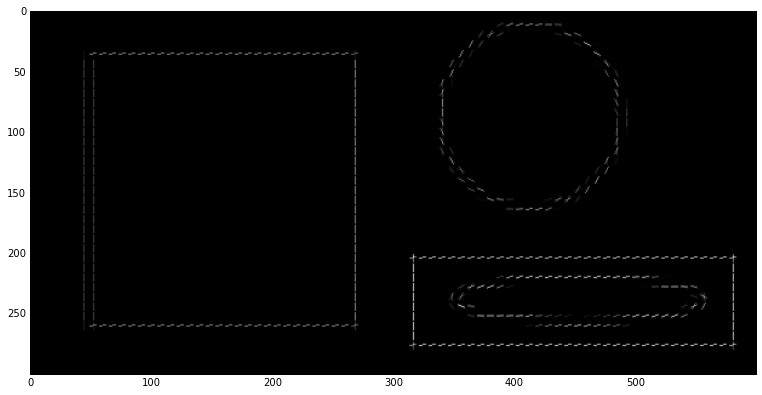

In [10]:

from skimage import exposure
from skimage import feature
import cv2


logo = cv2.imread('data/basic_shapes.png')
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

(H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), normalise=True, visualise=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

plt.figure(figsize=(13,13))
plt.imshow(hogImage, cmap='gray')
# from skimage import exposure
# from skimage import feature
# import cv2
 
# (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), normalise=True, visualise=True)
# hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
# hogImage = hogImage.astype("uint8")
 
# cv2.imshow("HOG Image", hogImage)

In [18]:
print "[INFO] extracting features..."
data = []
labels = []

for imagePath in paths.list_images('data/hog/car_logos/'):
    make = imagePath.split('/')[-2]
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edged = imutils.auto_canny(gray)
    
    (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = max(cnts, key=cv2.contourArea)
    
    (x, y, w, h) = cv2.boundingRect(c)
    logo = gray[y:y + h, x:x + w]
    logo = cv2.resize(logo, (200, 100))
    H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), normalise=True)
    data.append(H)
    labels.append(make)

[INFO] extracting features...


/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  

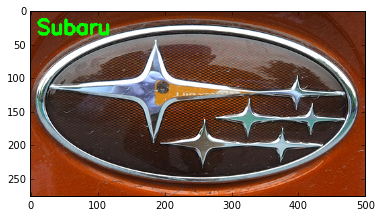

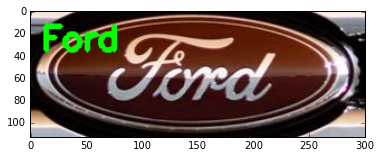

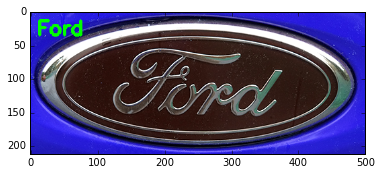

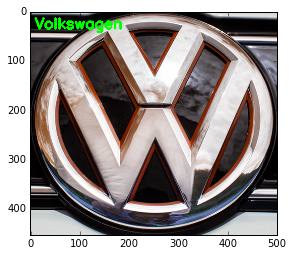

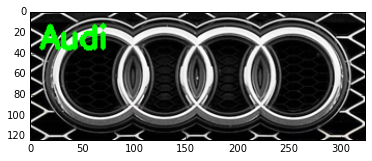

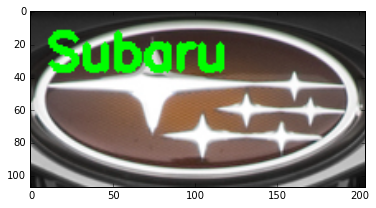

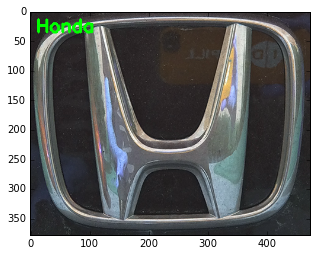

In [20]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(data, labels)
for imagePath in paths.list_images('data/hog/test_images/'):
    # load the test image, convert it to grayscale, and resize it to
    # the canonical size
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    logo = cv2.resize(gray, (200, 100))

    # extract Histogram of Oriented Gradients from the test image and
    # predict the make of the car
    (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
        cells_per_block=(2, 2), normalise=True, visualise=True)
    pred = model.predict(H)[0]

    # visualize the HOG image
    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    cv2.imshow("HOG Image", hogImage)

    # draw the prediction on the test image and display it
    cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
        (0, 255, 0), 3)
    
    plt.figure()
    plt.imshow(image)


# 11.2: Face detection in images
